# **Theory Questions :**

**Q1)What is Mean Average Precision (mAP) in the context of object detection, and how is it
calculated?**

**Ans-** mAP is a metric that evaluates the precision and recall of an object detection model of different classes. It provides a score to evluate the overall performance of the model by taking the mean APs for all classes. This metric is crucial for comparing different object detection models and helps us to evaluate accuracy of detecting objects.

to calculate AP first we need to calculate Precission(tp/tp+fp) and Recall(tp/tp+fn) and then we plot the graph and calculate the area under the curve and calculate the avergae of different points.

we generally use 11 pointers map here we calculate the are under the curve for 11 pointers and get the precission interpolation from y axis and divide it by 11.

**Q2) Explain the main differences between RCNN, Fast RCNN, and Faster RCNN.**

**Ans-** **RCNN** uses selective search to generate around 2000 region proposals, which is slow and computationally expensive whereas
**Fast RCNN** uses selective search for region proposals but integrates region proposal and classification into a single network, improving speed whereas
**Faster RCNN** uses a Region Proposal Network (RPN) that generates region proposals, significantly speeding up the process.


**Q3) How does the Region Proposal Network (RPN) in Faster RCNN improve the efficiency of the
detection process?**

**Ans-** the Region Proposal Network (RPN) in Faster RCNN improves the efficiency of the detection process by generating region proposals directly within the neural network. This eliminates the need for external region proposal methods like selective search, significantly speeding up the process. The RPN shares convolutional layers with the detection network, allowing for faster learning of region proposals and object detection, leading to a more streamlined and faster detection pipeline.


**Q4) What are the key improvements introduced in YOLOv2 (YOLO9000) compared to the original
YOLO algorithm?**

**Ans-** The YOLO (You Only Look Once) object detection algorithm is a single-stage object detector that divides the input image into a grid and simultaneously predicts bounding boxes and class probabilities for each grid cell. Unlike traditional methods that apply the detection model to various regions of the image multiple times, YOLO makes predictions in a single forward pass through the network, making it extremely fast. Its architecture typically consists of a convolutional neural network (CNN) that directly outputs the coordinates of bounding boxes, confidence scores, and class probabilities. YOLO's approach allows for real-time object detection with high accuracy and efficiency.

working:

* The image is divided into an 7 X 7 grid.Each grid cell is responsible for predicting 2 bounding boxes and their associated class probabilities.

* each passes through 30 filters.
* first 10 gives the bounding box metrics such as del x, del y, del H, del W ans cofidence score and remaining 20 gives conditional probabilyies of 20 classes.

* similary we get for 98 anchor boxes.
* we calculate the IOU and set a threshold and score less than threshold is set to 0.
* and then we implement NMS algorithm(non max supression) in which we calculate IOu of max class and current class and set a threshold if the value comes abov that threshold then we make it to 0 to get which detects the redundent anchour boxes and removes them suing the threshold value.
* at last we are left with very vew scores
* we compare that value in a flow chart if it folows the rule we mark it as correct and classifies it correct and move to next box.

**bQ5) **
**5) Ans-**
* applies batch normalization which fasts traing process and coverges faster.
* introduces multi scale traing in which training happens on diffrent images of different size and dimensions
* uses word tree(have 9000 classes) which works as flow chart of different classes having different score and brach having max score it chosses that object and it can classify within the class like if its a dog then it can predict wheteher its german sheferd or hound or for cat like persian or tabby instead of dark net.
* uses different nuber of anchor boxes instead of just 2 in v1.







"""
### Question:


#### Image Classification using the Celebrity Faces Dataset

You are tasked with designing an image classification architecture and using it to classify images from the Celebrity Faces Dataset, which consists of images belonging to 17 different celebrity classes. Follow the steps below to complete this task:

1. **Design an Image Classification Architecture**:
    - Create a convolutional neural network (CNN) architecture for image classification. The architecture should include:
        - Input layer suitable for the image size of the Celebrity Faces Dataset (images are generally around 474 pixels in one dimension).
        - Convolutional layers, pooling layers, and fully connected layers. Customize the number, type, and order of layers as you see fit.
        - Use suitable activation functions throughout the network.
        - Implement dropout or any other regularization techniques as needed.

2. **Compile the Model**:
    - Select an appropriate loss function and optimizer for multi-class classification.
    - Compile the model using your chosen parameters.

3. **Prepare and Split the Dataset**:
    - Load and preprocess the Celebrity Faces Dataset. Ensure to handle data augmentation if necessary.
    - Resize each image to a uniform size suitable for your model's input layer (e.g., resize images to 224x224 pixels).
    - Split the dataset into training and validation sets.

4. **Train the Model**:
    - Train the model using the training set of the Celebrity Faces Dataset.
    - Monitor the training process and adjust hyperparameters as needed.
    - Validate the model using the validation set.

5. **Evaluate the Model**:
    - Evaluate the performance of your model on the validation set.
    - Provide metrics such as accuracy, precision, recall, and F1-score.

6. **Classify New Images**:
    - During the exam, you will be provided with new images from the Celebrity Faces Dataset. Use your trained model to classify these images.
    - Report the predicted labels for the new images and discuss any challenges faced.

7. **Documentation and Analysis**:
    - Document your entire process, including:
        - Architecture design decisions.
        - Hyperparameter choices.
        - Training and evaluation procedures.
        - Results and analysis of the model's performance.

#### Notes:
- Utilize Python and a deep learning framework of your choice (e.g., TensorFlow, Keras) for implementing the CNN.
- The images in the Celebrity Faces Dataset should be resized to 224x224 pixels for consistency in input size.
- Ensure your code is well-structured and easy to follow, with clear comments where necessary.



Good luck with your preparation!
"""


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loaded images shape: (1799, 150, 150, 3)
Loaded labels shape: /n Images with Folder name (1799,) /n Images with Folder name


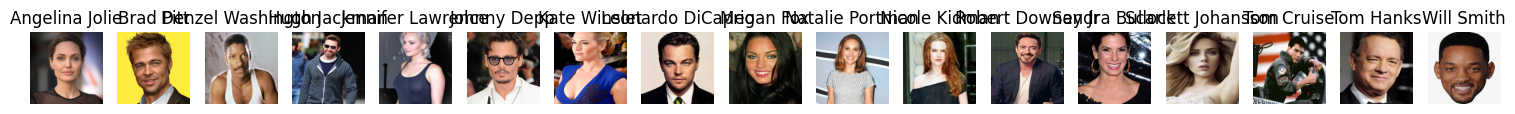

In [3]:
#Code for Loading the image
# Code for loading the dataset and plotting, with folder name

# first upload the dataset in google drive
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Set up the directory path where your dataset is located
dataset_directory = '/content/drive/MyDrive/Celebrity faces/Celebrity Faces Dataset'

# Function to load the dataset
def load_dataset(directory):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))  # Assumes each subdirectory is a class

    for i, class_name in enumerate(class_names):
        class_directory = os.path.join(directory, class_name)
        for filename in os.listdir(class_directory):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(class_directory, filename)
                image = Image.open(image_path)
                image = image.resize((150, 150))  # Resize if necessary
                image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
                images.append(image)
                labels.append(i)  # Store index of the class

    images = np.array(images)
    labels = np.array(labels)

    return images, labels, class_names

# Usage example
images, labels, class_names = load_dataset(dataset_directory)

# Print shape of loaded data for verification
print("Loaded images shape:", images.shape)
print("Loaded labels shape: /n Images with Folder name", labels.shape, "/n Images with Folder name")

# Plotting example: Plot one example image from each class
num_classes = len(class_names)
fig, axes = plt.subplots(1, num_classes, figsize=(15, 3))

for i, class_name in enumerate(class_names):
    class_indices = np.where(labels == i)[0]
    example_image = images[class_indices[0]]
    axes[i].imshow(example_image)
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 2, 2, 128)        

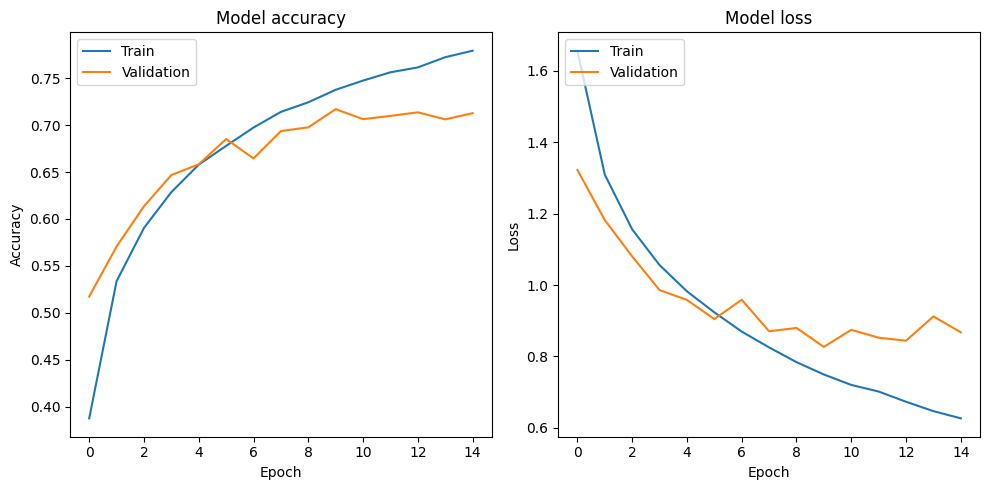

In [7]:
#Sample code for solving
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Function to create the CNN architecture
def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Hyperparameters
learning_rate = 0.001
batch_size = 32
epochs = 15

# Load and preprocess the dataset (example)
# Replace with actual loading and preprocessing steps
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Example input shape (to be adjusted based on dataset)
input_shape = train_images.shape[1:]
num_classes = len(set(train_labels.flatten()))

# Create the model
model = create_model(input_shape, num_classes)
model.summary()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

# Plot training history
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


**You can utilize any code, including our existing code, to enhance your project.**

**All the best**